# Demo notebook for Computer aided detection with Faster-RCNN

### Prerequisites

* You need to install py-faster-rcnn, see the github repository for instructions: https://github.com/rbgirshick/py-faster-rcnn

* You need a GPU with at least 8GB memory, with CUDA and cuDNN

### Import modules and change Faster-RCNN configs

In [2]:
import sys
# here is my py-faster-rcnn installation
sys.path.append('/opt/py-faster-rcnn/tools/')  
import _init_paths
from fast_rcnn.config import cfg
from fast_rcnn.test import im_detect
from fast_rcnn.nms_wrapper import nms
import caffe, cv2
from matplotlib import pyplot as plt
import numpy as np
#import imageio

# faster rcnn configs we need to change
cfg.TEST.HAS_RPN = True  # Use RPN for proposals
cfg.TEST.SCALES=(1737,)  # change scales
cfg.TEST.MAX_SIZE=2145  # change scales

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Define functions to load model, run detection, and visualize detection

In [3]:
def load_net(ptxt, w, device=0):
    """Load model."""
    caffe.set_mode_gpu()
    caffe.set_device(device)
    cfg.GPU_ID = device
    net = caffe.Net(ptxt, w, caffe.TEST)
    return net


def detect(net, im,  NMS_THRESH = 0.1, cls_ind = 2,
           CLASSES = ('__background__','BENIGN','MALIGNANT')):
    """Detect cancer."""
    cfg.TEST.HAS_RPN = True
    scores, boxes =  im_detect(net, im)
    
    cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
    cls_scores = scores[:, cls_ind]
    dets = np.hstack((cls_boxes,
                        cls_scores[:, np.newaxis])).astype(np.float32)
    keep = nms(dets, NMS_THRESH)
    dets = dets[keep, :]
    return dets


def vis_detections(im, dets, CONF_THRESH = 0.23, compressed=False):
    CONF_THRESH = 0.1
    """Draw boxes around detected cancer."""   
    fig,ax=plt.subplots(figsize=(8,10))
    ax.imshow(im,cmap='gray_r')
    inds = np.where(dets[:, -1] >= CONF_THRESH)[0]
    scores_only = [0]
    
    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]
        
        #if not compressed:
            #print("Lesion {}".format(i+1))
            #print("Confidence of class as malignant: {}".format(score))
            #print("Locations: Top left coordinate: {}, {} \n".format(bbox[0], bbox[1]))
        #else:
            #print("Lesion {0}, Malignant {1}".format(i+1, score))
        
        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False, linestyle ='dashed',
                          edgecolor=(0.95, 0.95, 0.5), linewidth=3))
        plt.text(bbox[0], bbox[1], "ROI "+str(i+1)+": "+"\n"+"{:.2f}".format(score), fontsize=12, color="red")
        scores_only.append(score)
    
    #plt.axis('off')
    #plt.tight_layout()
    #plt.axis('off') #Turning axis on/off
    plt.tight_layout()
    plt.show()
    return fig, scores_only
    

### Load the model

In [4]:
# place the model weights here
net = load_net(ptxt='vgg16_frcnn_cad_test.prototxt',
               w='vgg16_frcnn_cad.caffemodel')

### Load and analyze image

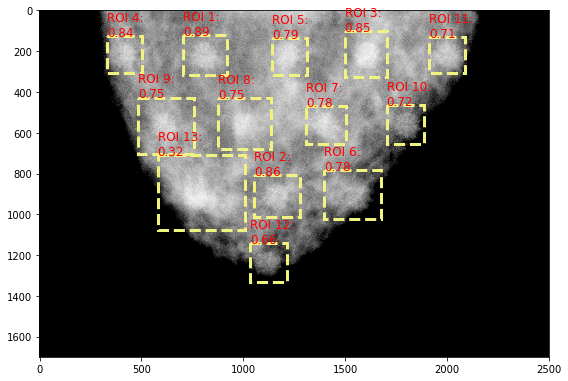

Mass 4: 
Mean, all ROIs: 0.745823919773
Mean, all but lowest: 0.78167963028


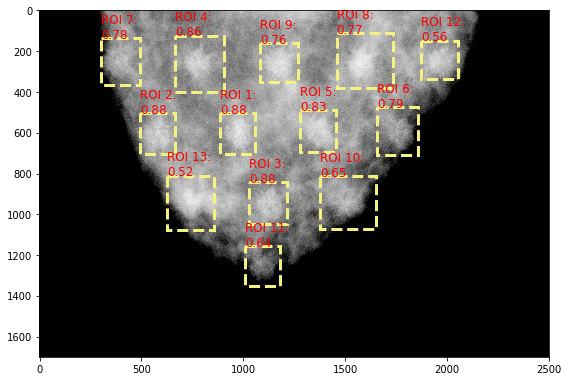

Mass 5: 
Mean, all ROIs: 0.753955006599
Mean, all but lowest: 0.773394584656


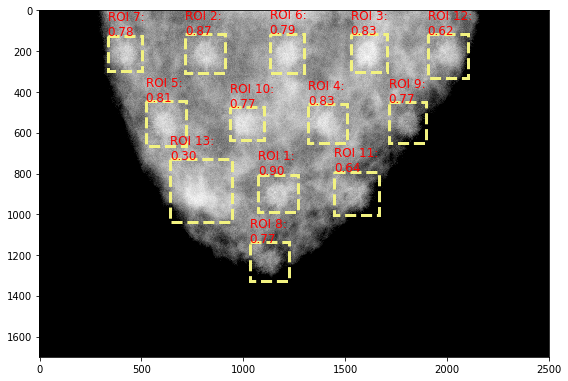

Mass 6: 
Mean, all ROIs: 0.744188308716
Mean, all but lowest: 0.781266987324


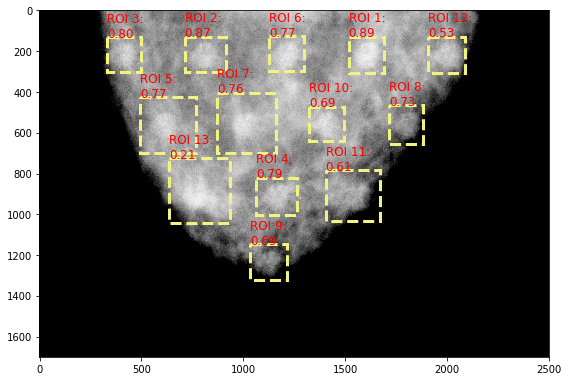

Mass 9: 
Mean, all ROIs: 0.700000107288
Mean, all but lowest: 0.741198837757


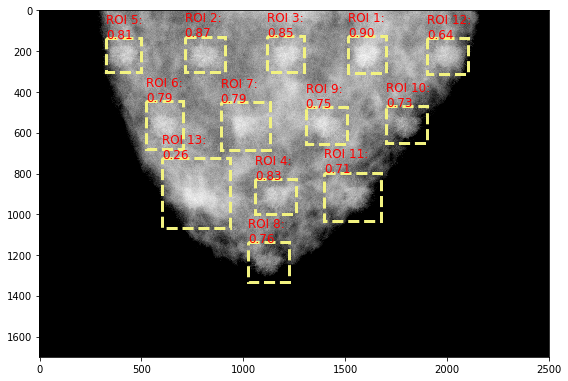

Mass 10: 
Mean, all ROIs: 0.746039092541
Mean, all but lowest: 0.786584198475


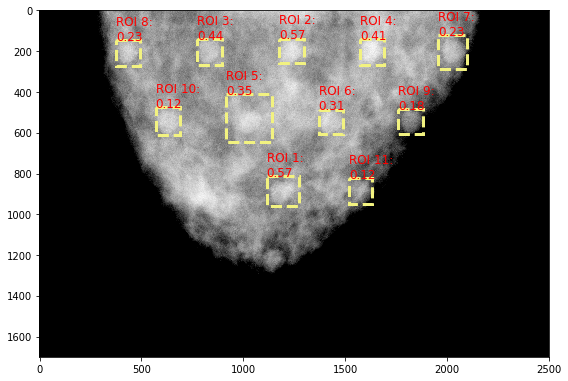

Mass Lobular: 
Mean, all ROIs: 0.319736689329
Mean, all but lowest: 0.339768528938


In [6]:
# load image, customize this part to load your images 
# from whatever format you use

im = cv2.imread('/opt/images/postproc_mass/texture/SameSpicMaligTestMass4_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
# run detection
detections = detect(net, im)
# visualize detections
fig, scores_only = vis_detections(im, detections)
print('Mass 4: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))

im = cv2.imread('/opt/images/postproc_mass/texture/SameSpicMaligTestMass5_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
detections = detect(net, im)
fig, scores_only = vis_detections(im, detections)
print('Mass 5: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))

im = cv2.imread('/opt/images/postproc_mass/texture/SameSpicMaligTestMass6_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
detections = detect(net, im)
fig, scores_only = vis_detections(im, detections)
print('Mass 6: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))

im = cv2.imread('/opt/images/postproc_mass/texture/SameSpicMaligTestMass9_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
detections = detect(net, im)
fig, scores_only = vis_detections(im, detections)
print('Mass 9: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))

im = cv2.imread('/opt/images/postproc_mass/texture/SameSpicMaligTestMass10_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
detections = detect(net, im)
fig, scores_only = vis_detections(im, detections)
print('Mass 10: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))

im = cv2.imread('/opt/images/postproc_mass/texture/SameLobMaligTest_1740x2415x1140_array0_density1.56_full_1.0_15_8bit.png')
detections = detect(net, im)
fig, scores_only = vis_detections(im, detections)
print('Mass Lobular: ')
print("Mean, all ROIs: {}".format(np.mean(scores_only[1:])))
print("Mean, all but lowest: {}".format(np.mean(scores_only[1:-1])))



### That's it

The example image is from the INBreast dataset. Courtesy of the Breast Research Group, INESC Porto, Portugal. Thank you.